In [73]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure 
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.io.phonopy import get_ph_bs_symm_line
import matplotlib.pyplot as plt
import numpy as np

# Téléchargement et visualisation de la structure de bande de phonons du TiCoSb

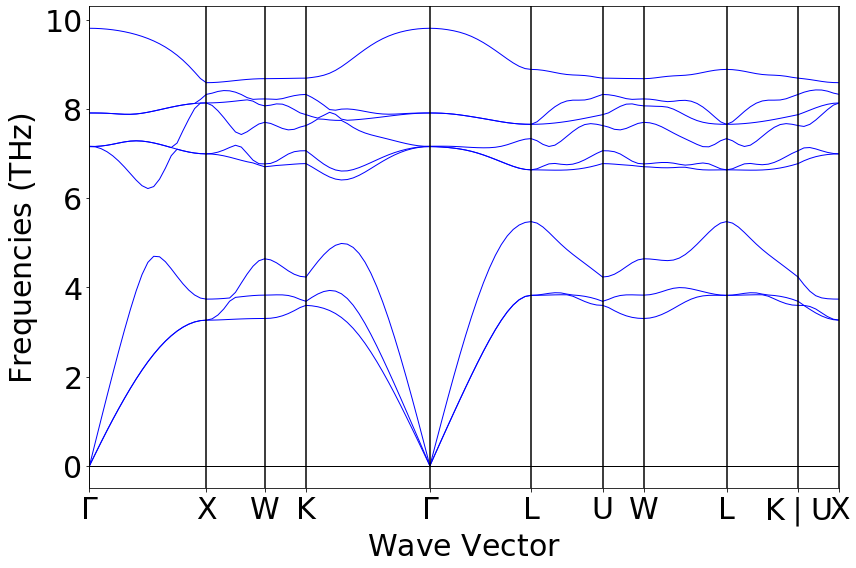

In [74]:
with MPRester("nTQqrVPUX1GFrAOLnWc2") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-5967")
    structure.to(filename = "TiCoSb.cif")
    
    # Téléchargement de la structure de bande de phonons du TiCoSb
    bs_phonon = m.get_phonon_bandstructure_by_material_id("mp-5967")
    bsplotter = PhononBSPlotter(bs_phonon)
    bsplotter.show()

# Calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

## Branches acoustiques

Un cristal réel à p atomes par maille présente 3 branches de dispersion acoustique et 3p-3 branches de dispersion optique. Ici, nous allons uniquement nous intéresser aux branches acoustiques. \
On reconnait les branches acoustiques car elles sont de fréquence nulle au centre de la zone de Brillouin (aux points $\Gamma$ sur le graphe). On observe sur le graphe de la structure de bande de phonons ci-dessus qu'il y a trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin, ces directions sont $\Gamma - X$, $\Gamma - K$ et $\Gamma - L$. 

## Vitesse du son dans ces branches

Sous l'hypothèse que nous sommes dans le cas de grandes longueurs d'ondes afin de pouvoir faire une approximation linéaire de la variation de la dispersion $\omega$ par rapport au vecteur d'onde q, la vitesse du son est définie par la formule suivante : 
$$v_{s} = \frac{\partial \omega}{\partial q} = 2 \pi \frac{\partial f}{\partial q}$$

La vitesse du son des trois branches acoustiques que nous voulons calculer correspond donc à la pente des courbes dans les trois directions déterminées ci-dessus pour des petits vecteurs d'onde q, multipliée par 2$\pi$. Sans oublier de faire la conversion des unités du vecteur d'onde et de la fréquence. 

In [80]:
#Données nécessaires pour le calcul de la vitesse du son
data = bsplotter.bs_plot_data()
f = data['frequency']
d = data['distances']

In [81]:
#Direction Γ-X
q0 = d[0][0]/1e-10   #On divise par 1e-10 pour convertir le vecteur d'onde q de Å vers m^(-1)
q1 = d[0][1]/1e-10  

f0 = f[0][1][0]*1e12 #On multiplie par 1e12 pour convertir la fréquence f de THz en Hz 
f1 = f[0][1][1]*1e12

vs1 = 2 * np.pi * np.abs((f1-f0)/(q1-q0))

print("La vitesse du son de la branche acoustique considérée dans la direction Γ-X vaut: {0:.3f} m/s".format(vs1))

La vitesse du son de la branche acoustique considérée dans la direction Γ-X vaut: 3111.648 m/s


In [85]:
#Direction Γ-K
q0 = d[3][-1]/1e-10  
q1 = d[3][-2]/1e-10  

f0 = f[3][0][-2]*1e12
f1 = f[3][0][-1]*1e12

vs2 = 2 * np.pi * np.abs((f1-f0)/(q1-q0))

print("La vitesse du son de la branche acoustique considérée dans la direction Γ-K vaut: {0:.3f} m/s".format(vs2))

La vitesse du son de la branche acoustique considérée dans la direction Γ-K vaut: 3196.836 m/s


In [83]:
#Direction Γ-L
q0 = d[4][0]/1e-10  
q1 = d[4][1]/1e-10  

f0 = f[4][2][0]*1e12  
f1 = f[4][2][1]*1e12

vs3 = 2 * np.pi * np.abs((f1-f0)/(q1-q0))

print("La vitesse du son de la branche acoustique considérée dans la direction Γ-L vaut: {0:.3f} m/s".format(vs3))

La vitesse du son de la branche acoustique considérée dans la direction Γ-L vaut: 5827.558 m/s


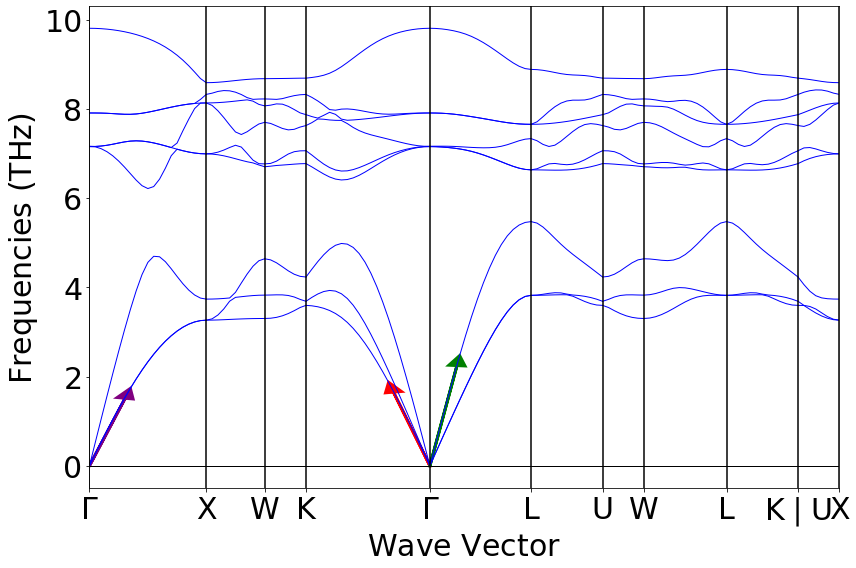

In [84]:
#Représentation graphique 
bsplotter.get_plot()

#Pente Γ-X en mauve: 
plt.arrow(d[0][0], f[0][1][0], d[0][7]-d[0][0], f[0][1][7]-f[0][1][0], head_width=0.15, linewidth=3, length_includes_head=True, color='purple')
#Pente Γ-K en rouge: 
plt.arrow(d[3][-1], f[3][0][-1], d[3][14]-d[3][-1], f[3][0][14]-f[3][0][-1], head_width=0.15, linewidth=3, length_includes_head=True, color='red')
#Pente Γ-L en vert: 
plt.arrow(d[4][0], f[4][2][0], d[4][5]-d[4][0], f[4][2][5]-f[4][2][0], head_width=0.15, linewidth=3, length_includes_head=True, color='green')
plt.show()

Les résultats obtenus des vitesses du son paraissent cohérent avec le graphe ci-dessus. En effet, les pentes des flèches mauve et rouge semblent très similaires et les valeurs de vitesse du son dans ces branches et ces directions le sont aussi. De plus, la pente de la flèche verte est plus forte que les pentes mauve et rouge ce qui se traduit par une plus grande vitesse du son dans cette branche-là et dans cette direction là. \
L'ordre de grandeur des vitesses obtenues semble également correct car il correspond à l'ordre de grandeur typique de la vitesse du son dans un cristal. 